In [14]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Input, Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt

In [15]:
# Load the MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalise pixel values to [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

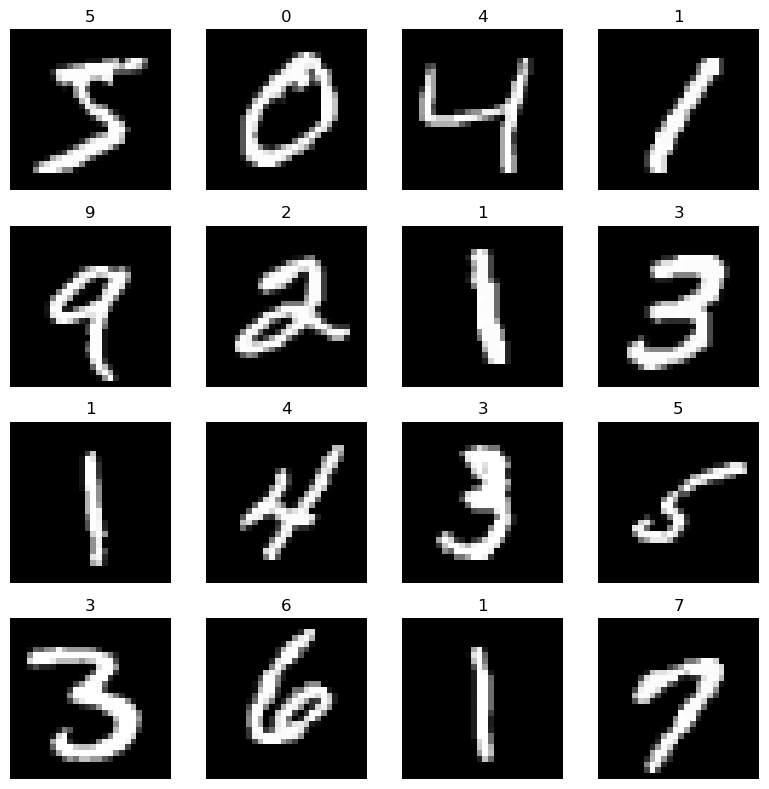

In [16]:
# Show the first 9 images and their labels
plt.figure(figsize=(8, 8))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [17]:
model = Sequential([
    Input(shape=(28, 28)), #Define image input shape
    Flatten(), # Flatten 28x28 images into 784-element 1D vectors
    Dense(128, activation='relu'), # Hidden layer with 128 neurons and ReLU
    Dense(64, activation='relu'), # Another hidden layer
    Dense(10, activation='softmax') # Output layer for 10 classes (digits 0–9)
])

In [18]:
#Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
#Train the model and store training history
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8686 - loss: 0.4461 - val_accuracy: 0.9655 - val_loss: 0.1114
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9662 - loss: 0.1111 - val_accuracy: 0.9757 - val_loss: 0.0818
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9782 - loss: 0.0681 - val_accuracy: 0.9767 - val_loss: 0.0844
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9839 - loss: 0.0534 - val_accuracy: 0.9762 - val_loss: 0.0847
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9875 - loss: 0.0398 - val_accuracy: 0.9800 - val_loss: 0.0749


In [20]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9715 - loss: 0.0964  
Test accuracy: 0.9759


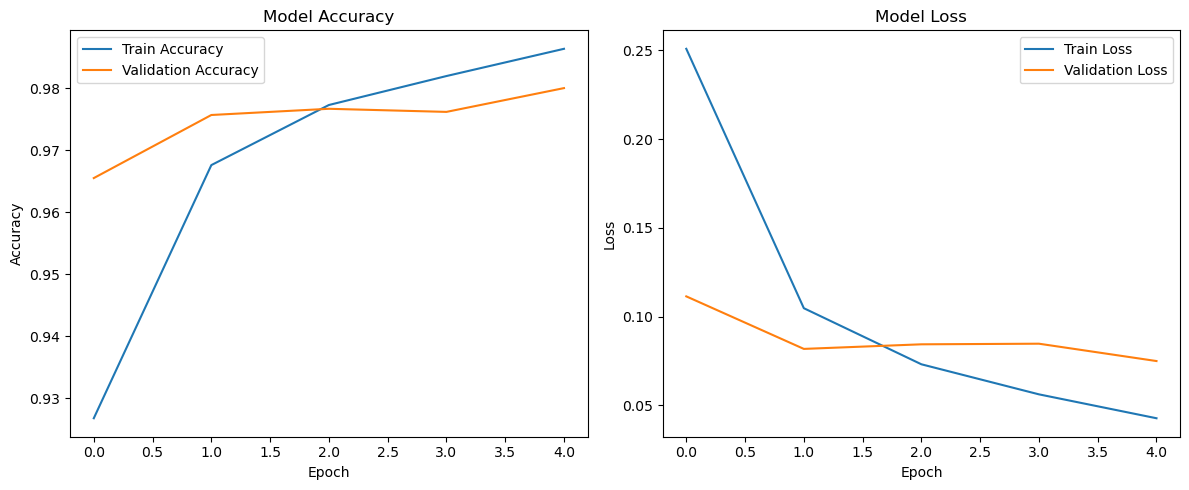

In [21]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
